**Here my aim is:-** 

* 1.compress racoon grey scale image into 5 clusters. 
* 2.Visualize both raw and compressed gray scaled image after clustering.

### Importing all Required Libraries

In [49]:
import numpy as np
import pandas as pd
from sklearn import cluster, datasets
from scipy import misc
from sklearn.cluster import KMeans
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import cv2

In [2]:
img = scipy.misc.face()
img.shape

(768, 1024, 3)

## Real Picture

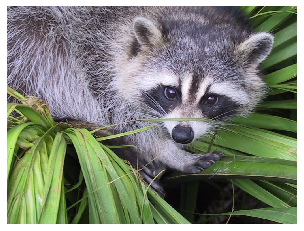

In [3]:
plt.imshow(img)
plt.axis('off')
plt.show()

In [4]:
img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

### Grayscaled Image

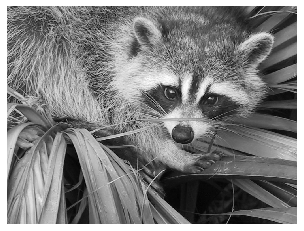

In [5]:
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

In [6]:
df = pd.DataFrame(img_gray)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,117,134,149,151,151,154,155,152,143,133,...,167,162,159,150,135,121,115,118,128,136
1,86,107,127,134,138,145,149,148,161,151,...,160,155,148,137,122,109,107,117,133,145
2,70,91,112,120,124,128,129,126,136,132,...,151,144,125,119,109,103,105,117,133,144
3,80,96,112,119,124,125,119,110,100,100,...,132,122,103,105,107,110,113,117,122,126
4,102,112,122,131,141,146,139,126,108,100,...,104,93,97,103,112,118,119,116,112,110


In [8]:
df.shape

(768, 1024)

### K-Means Clustering

In [9]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter=500, random_state = 0)
y_kmeans = kmeans.fit_predict(df)

In [10]:
centers = kmeans.cluster_centers_

In [11]:
centrex = centers[:,0]
centrey = centers[:,1]

In [12]:
len(y_kmeans),len(df)

(768, 768)

In [13]:
df['Class'] = y_kmeans

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,Class
0,117,134,149,151,151,154,155,152,143,133,...,162,159,150,135,121,115,118,128,136,1
1,86,107,127,134,138,145,149,148,161,151,...,155,148,137,122,109,107,117,133,145,1
2,70,91,112,120,124,128,129,126,136,132,...,144,125,119,109,103,105,117,133,144,1
3,80,96,112,119,124,125,119,110,100,100,...,122,103,105,107,110,113,117,122,126,1
4,102,112,122,131,141,146,139,126,108,100,...,93,97,103,112,118,119,116,112,110,1


### Seperating Classes

In [15]:
zero = df[df['Class']==0]
one = df[df['Class']==1]
two = df[df['Class']==2]
three = df[df['Class']==3]
four = df[df['Class']==4]

In [16]:
zero_img = zero.copy()
one_img = one.copy()
two_img = two.copy()
three_img = three.copy()
four_img = four.copy()
del df['Class']

### Seperate Images

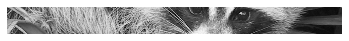

In [17]:
plt.imshow(zero_img,cmap='gray')
plt.axis('off')
plt.show()

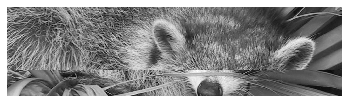

In [18]:
plt.imshow(one_img,cmap='gray')
plt.axis('off')
plt.show()

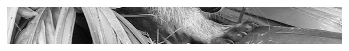

In [19]:
plt.imshow(two_img,cmap='gray')
plt.axis('off')
plt.show()

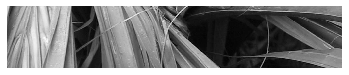

In [20]:
plt.imshow(three_img,cmap='gray')
plt.axis('off')
plt.show()

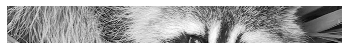

In [21]:
plt.imshow(four_img,cmap='gray')
plt.axis('off')
plt.show()

In [22]:
print(f'Number of data points:-\nzero class:{len(zero_img)}\nOne class:{len(one_img)}\nTwo class:{len(two_img)}\nThree class:{len(three_img)}\nFour class:{len(four_img)}')

Number of data points:-
zero class:82
One class:272
Two class:114
Three class:188
Four class:112


In [24]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,117,134,149,151,151,154,155,152,143,133,...,167,162,159,150,135,121,115,118,128,136
1,86,107,127,134,138,145,149,148,161,151,...,160,155,148,137,122,109,107,117,133,145
2,70,91,112,120,124,128,129,126,136,132,...,151,144,125,119,109,103,105,117,133,144
3,80,96,112,119,124,125,119,110,100,100,...,132,122,103,105,107,110,113,117,122,126
4,102,112,122,131,141,146,139,126,108,100,...,104,93,97,103,112,118,119,116,112,110


### Now Compressing data using PCA

In [26]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [27]:
pca = PCA(n_components=2,random_state=0)
scaler = StandardScaler()
X = scaler.fit_transform(df)
pca.fit(X)

PCA(n_components=2, random_state=0)

In [28]:
X = pca.transform(X)

In [29]:
X = pd.DataFrame(X,columns=['1stPrinc','2ndPrinc'])

### Again Clustering with Compressed Data

In [30]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++',max_iter=500, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [31]:
centers = kmeans.cluster_centers_

In [32]:
centrex = centers[:,0]
centrey = centers[:,1]

In [33]:
X['Class'] = y_kmeans

In [34]:
X.head()

,1stPrinc,2ndPrinc,Class
0,2.770496,4.120022,3
1,2.477963,3.869899,3
2,1.195132,2.534619,3
3,0.240896,1.391465,3
4,0.867917,1.935887,3


In [35]:
X['Class'].unique()

array([3, 0, 4, 1, 2], dtype=int32)

### Scatterplot of five different Classes

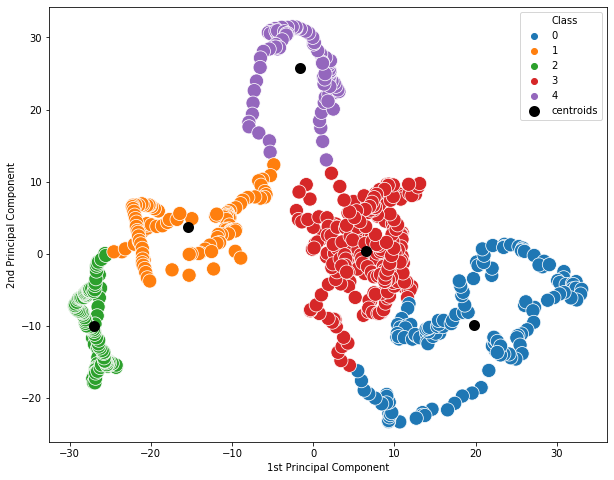

In [37]:
plt.figure(figsize=(10,8))
sns.scatterplot(X['1stPrinc'],X['2ndPrinc'],hue=X['Class'],s=200,markers='o',palette='tab10')
plt.scatter(centrex,centrey,color='k',marker='o',linewidths=5,label='centroids')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.legend()
plt.show()

In [38]:
df['Class'] = y_kmeans

In [39]:
df.shape

(768, 1025)

### Seperating the Classes

In [40]:
zero = df[df['Class']==0]
one = df[df['Class']==1]
two = df[df['Class']==2]
three = df[df['Class']==3]
four = df[df['Class']==4]

In [41]:
zero_img = zero.copy()
one_img = one.copy()
two_img = two.copy()
three_img = three.copy()
four_img = four.copy()
del df['Class']

### Images of each classes with compressed Data

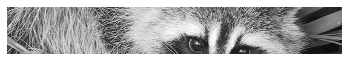

In [43]:
plt.imshow(zero_img,cmap='gray')
plt.axis('off')
plt.show()

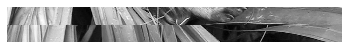

In [44]:
plt.imshow(one_img,cmap='gray')
plt.axis('off')
plt.show()

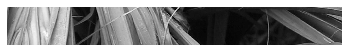

In [45]:
plt.imshow(two_img,cmap='gray')
plt.axis('off')
plt.show()

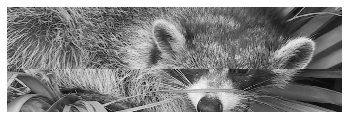

In [46]:
plt.imshow(three_img,cmap='gray')
plt.axis('off')
plt.show()

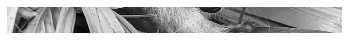

In [47]:
plt.imshow(four_img,cmap='gray')
plt.axis('off')
plt.show()

In [48]:
print(f'Number of data points after compression:-\nzero class:{len(zero_img)}\nOne class:{len(one_img)}\nTwo class:{len(two_img)}\nThree class:{len(three_img)}\nFour class:{len(four_img)}')

Number of data points after compression:-
zero class:144
One class:106
Two class:117
Three class:321
Four class:80
